# Capstone: Predicting Airbnb Prices - ML Models

Problem of predicting a  price category is a supervised learning problem. Supervised learning means that machine learning models are trained on ‘labelled’ data - input and output are already known. As there are multiple price categories, this is a multi class problem.


In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

from yellowbrick.classifier import ClassPredictionError

%matplotlib inline

In [184]:
data  = pd.read_csv(R'/Users/martahuhoja/Documents/IOD/Capstone/Airbnb/data_final.csv')

In [185]:
data.head()

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,...,region_Waitākere Ward,region_Whau Ward,region_Ōrākei Ward,amen_group_kitchen,amen_group_personal,amen_group_safety,amen_group_household,amen_group_bedroom,amen_group_electronics,amen_group_extra_spaces
0,119431,0,1,1,1,8,1.0,3.0,6.0,1,...,0,0,0,15,3,3,11,1,1,3
1,154119,0,1,1,0,2,1.0,1.0,2.0,3,...,1,0,0,6,2,1,8,1,2,0
2,154130,1,1,1,1,4,1.0,2.0,2.0,2,...,1,0,0,3,4,3,8,2,2,0
3,216802,0,4,1,1,2,1.0,1.0,1.0,2,...,0,0,0,1,2,0,7,1,2,1
4,216846,0,4,1,1,1,1.0,1.0,1.0,2,...,0,0,0,2,2,0,6,0,2,1


In [186]:
data.tail()

,id,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,...,region_Waitākere Ward,region_Whau Ward,region_Ōrākei Ward,amen_group_kitchen,amen_group_personal,amen_group_safety,amen_group_household,amen_group_bedroom,amen_group_electronics,amen_group_extra_spaces
4539,750799279512337008,0,86,1,1,3,1.0,1.0,2.0,1,...,0,0,0,8,1,3,7,2,2,1
4540,750986727197116700,0,1,1,1,2,1.0,1.0,1.0,1,...,0,0,0,2,1,3,3,0,2,2
4541,751579355490586247,0,1,1,1,4,1.0,1.0,2.0,1,...,0,0,0,1,1,1,6,0,2,1
4542,752432468822072687,0,1,1,0,4,2.0,1.0,1.0,1,...,0,0,0,2,1,1,3,0,2,2
4543,753694431140378695,0,6,1,1,4,1.0,2.0,2.0,1,...,0,0,0,12,4,1,11,2,1,2


In [187]:
data.shape

(4544, 49)

In [188]:
data.columns

Index(['id', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'price_category', 'response_within a day',
       'room_Entire home/apt', 'room_Hotel room', 'room_Private room',
       'region_Albert-Eden-Puketāpapa Ward', 'region_Howick Ward',
       'region_Manukau Ward', 'region_Manurewa-Papakura Ward',
       'region_Maungakiekie-Tāmaki Ward', 'region_North Shore Ward',
       'region_Rodney Ward', 'region_Waitematā and Gulf Ward',
       'region_Wait

In [189]:
data.dtypes

id                                      int64
host_is_superhost                       int64
host_listings_count                     int64
host_has_profile_pic                    int64
host_identity_verified                  int64
accommodates                            int64
bathrooms_text                        float64
bedrooms                              float64
beds                                  float64
minimum_nights                          int64
maximum_nights                          int64
availability_30                         int64
availability_60                         int64
availability_90                         int64
availability_365                        int64
number_of_reviews                       int64
number_of_reviews_ltm                   int64
number_of_reviews_l30d                  int64
review_scores_rating                  float64
review_scores_accuracy                float64
review_scores_checkin                 float64
review_scores_communication       

In [190]:
X= data.drop(columns=['id','price_category'])
y= data['price_category']

In [191]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [193]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3635, 47), (909, 47), (3635,), (909,))

After splitting the data, it was standardised using Standard Scaler which standardised the data values into a standard format as data was not on the same scale. 

In [194]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

Models used in this project are: 

Logistic Regression, Support Vector Machine, K-Nearest Neighbour, Decision Tree, Random Forest and XGBoost. 
Metric used for evaluation is accuracy. Model accuracy is defined as the number of classifications a model correctly predicts divided by the total number of predictions made.
Results will also be displayed with classification matrix and using Yellowbrick Visualizer for class prediction error. 

## Logistic regression

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [196]:
y_pred_lr = logreg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))

Accuracy: 60.62%


In [197]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       142
           1       0.58      0.55      0.56       262
           2       0.62      0.73      0.67       324
           3       0.58      0.45      0.51       140
           4       0.35      0.22      0.27        41

    accuracy                           0.61       909
   macro avg       0.56      0.53      0.54       909
weighted avg       0.60      0.61      0.60       909



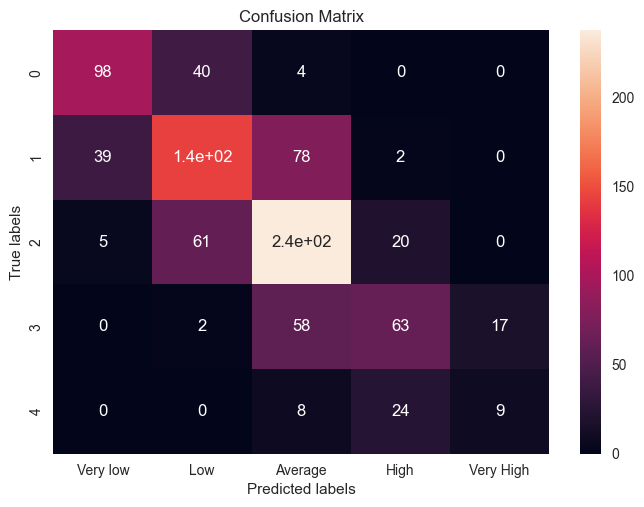

In [198]:
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
ax= plt.subplot()
sns.heatmap( confusion_matrix_lr, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Very low", "Low", "Average", "High", "Very High"])
ax.yaxis.set_ticklabels(["0", "1", "2", "3", "4"]);

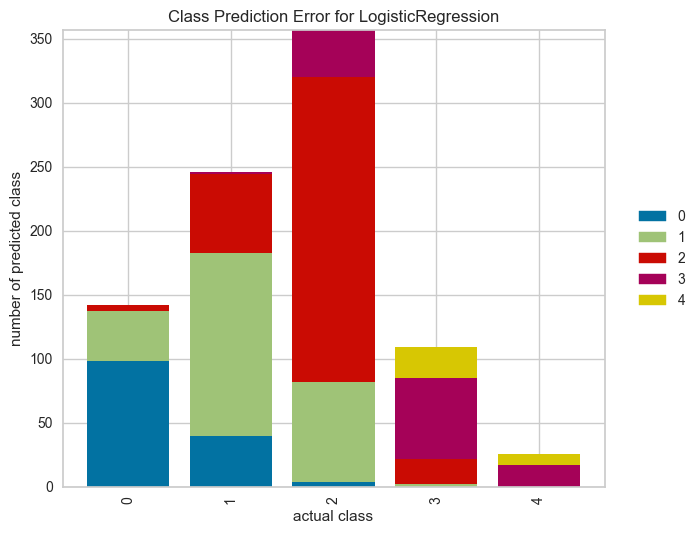

In [200]:
visualizer_lr = ClassPredictionError(logreg)
visualizer_lr.fit(X_train, y_train)
visualizer_lr.score(X_test, y_test)
visualizer_lr.show();

Deafult logistic regression model has accuracy 60.62%. Further imporvment will be searched with grid search. 

In [201]:
logreg2 = LogisticRegression(max_iter=10000, random_state=7)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'lbfgs']}

grid_search = GridSearchCV(logreg2, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))


/Users/martahuhoja/miniconda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/martahuhoja/miniconda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/martahuhoja/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/martahuhoja/miniconda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.p

Best parameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score: 0.62


In [202]:
logreg_best = LogisticRegression(max_iter=10000, random_state=7, C=100, penalty='l2', solver='lbfgs')
logreg_best.fit(X_train, y_train)
y_pred_lr_best = logreg_best.predict(X_test)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
print("Accuracy: %.2f%%" % (accuracy_lr_best * 100.0))

Accuracy: 60.62%


A better result was not achieved. 

## SVM

In [204]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svm = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.17%


SVM achieved accuracy 61.17%

Note: SVM accuracy in presentation was written as 59.63 which is a result of a different SVC run below. This is a mistake and obviously first one is better result.

In [207]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       142
           1       0.59      0.57      0.58       262
           2       0.60      0.77      0.67       324
           3       0.58      0.44      0.50       140
           4       0.38      0.12      0.19        41

    accuracy                           0.61       909
   macro avg       0.58      0.51      0.53       909
weighted avg       0.61      0.61      0.60       909



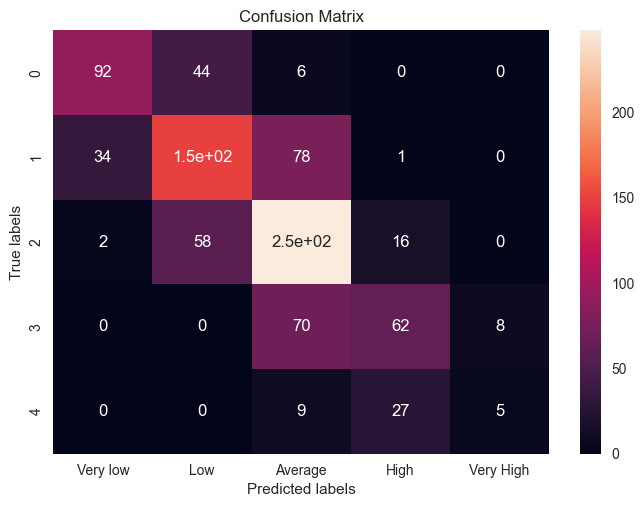

In [205]:
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
ax= plt.subplot()
sns.heatmap( confusion_matrix_svm, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Very low", "Low", "Average", "High", "Very High"])
ax.yaxis.set_ticklabels(["0", "1", "2", "3", "4"]);

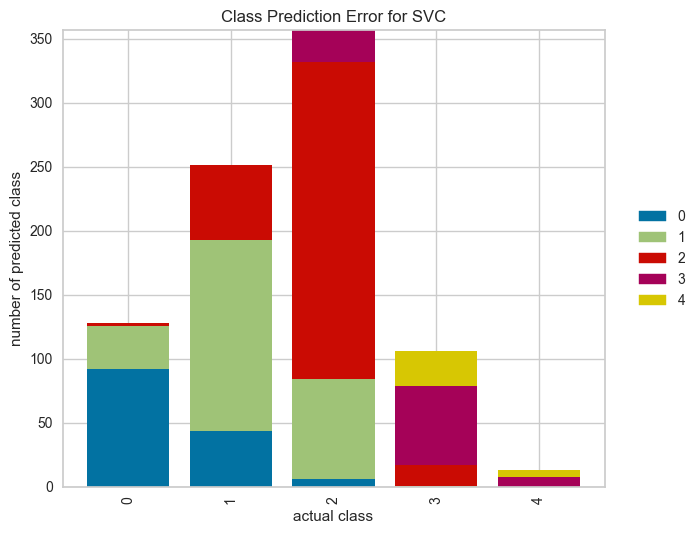

In [206]:
visualizer_svm = ClassPredictionError(svc)
visualizer_svm.fit(X_train, y_train)
visualizer_svm.score(X_test, y_test)
visualizer_svm.show();

In [212]:
svc1 = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svc1.fit(X_train, y_train)
y_pred_svm1 = svc1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred_svm1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))


Accuracy: 59.63%


In [213]:
print(classification_report(y_test, y_pred_svm1))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70       142
           1       0.57      0.56      0.57       262
           2       0.61      0.71      0.65       324
           3       0.55      0.43      0.48       140
           4       0.32      0.17      0.22        41

    accuracy                           0.60       909
   macro avg       0.55      0.51      0.52       909
weighted avg       0.59      0.60      0.59       909



## KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test) 
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 53.14%


In [16]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.64      0.54      0.59       142
           1       0.48      0.54      0.51       262
           2       0.52      0.63      0.57       324
           3       0.58      0.37      0.45       140
           4       0.44      0.20      0.27        41

    accuracy                           0.53       909
   macro avg       0.54      0.46      0.48       909
weighted avg       0.54      0.53      0.53       909



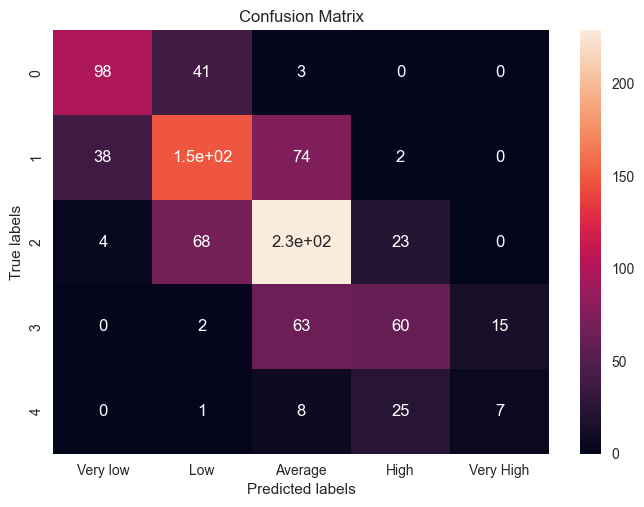

In [63]:
confusion_matrix_knn = confusion_matrix(y_test, knn_predictions)
ax= plt.subplot()
sns.heatmap( confusion_matrix_svm, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Very low", "Low", "Average", "High", "Very High"])
ax.yaxis.set_ticklabels(["0", "1", "2", "3", "4"]);

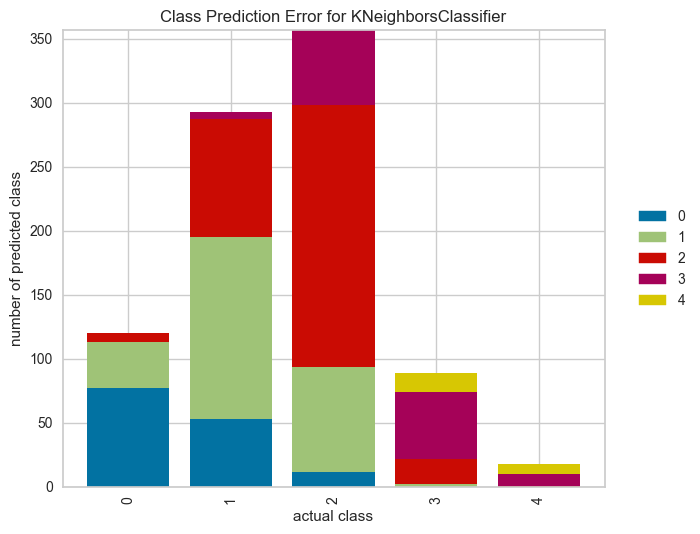

In [64]:
visualizer_knn = ClassPredictionError(knn)
visualizer_knn.fit(X_train, y_train)
visualizer_knn.score(X_test, y_test
visualizer_knn.show();

K nearest neighbour with number of neighbours set to 7 has accuracy: 53.14%.

## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier().fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
accuracy = accuracy_score(y_test, dtree_predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 49.83%


In [44]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56       142
           1       0.50      0.49      0.49       262
           2       0.54      0.55      0.55       324
           3       0.41      0.40      0.40       140
           4       0.24      0.27      0.25        41

    accuracy                           0.50       909
   macro avg       0.45      0.45      0.45       909
weighted avg       0.50      0.50      0.50       909



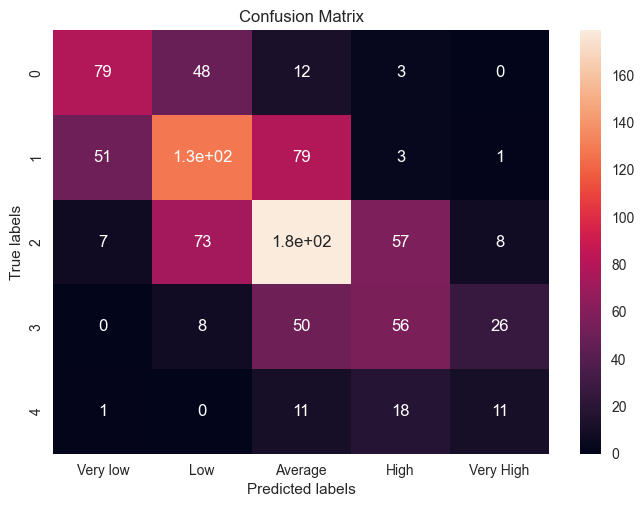

In [66]:
confusion_matrix_dt = confusion_matrix(y_test, dtree_predictions)
ax= plt.subplot()
sns.heatmap( confusion_matrix_dt, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Very low", "Low", "Average", "High", "Very High"])
ax.yaxis.set_ticklabels(["0", "1", "2", "3", "4"]);

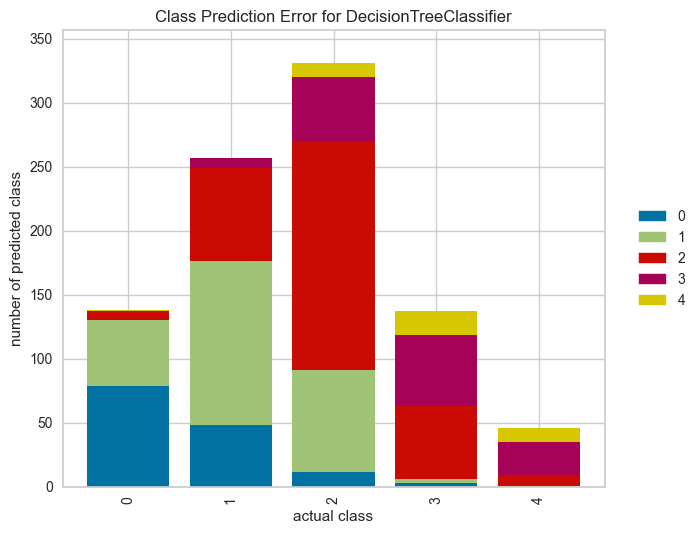

In [65]:
visualizer_dt = ClassPredictionError(dtree_model)
visualizer_dt.fit(X_train, y_train)
visualizer_dt.score(X_test, y_test)
visualizer_dt.show();

Default decision tree has accuracy 49.83% and is the worst performing model. 

## Random Forest

In [68]:
clf = RandomForestClassifier(n_estimators=1000, random_state=7)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

Accuracy: 63.70%


In [134]:
f1_score_rf = f1_score(y_test, y_pred_rf, average='micro')
print("F1 score: %.2f%%" % (f1_score_rf * 100.0))

F1 score: 63.70%


In [69]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.64      0.71       142
           1       0.63      0.66      0.64       262
           2       0.61      0.76      0.68       324
           3       0.61      0.46      0.52       140
           4       0.56      0.12      0.20        41

    accuracy                           0.64       909
   macro avg       0.64      0.53      0.55       909
weighted avg       0.64      0.64      0.63       909



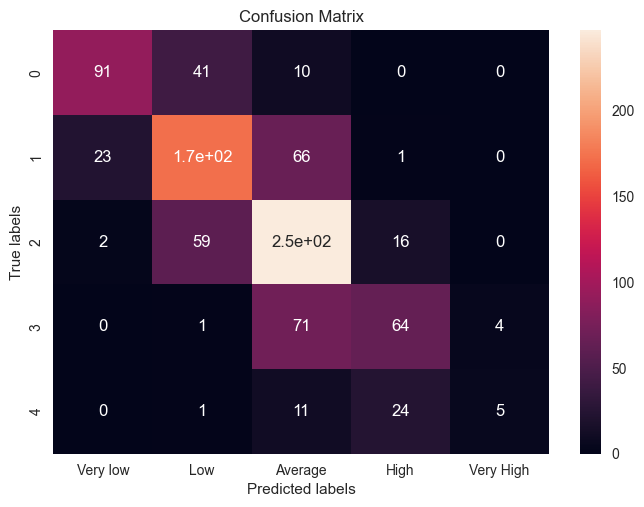

In [72]:
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ax= plt.subplot()
sns.heatmap( confusion_matrix_rf, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Very low", "Low", "Average", "High", "Very High"])
ax.yaxis.set_ticklabels(["0", "1", "2", "3", "4"]);

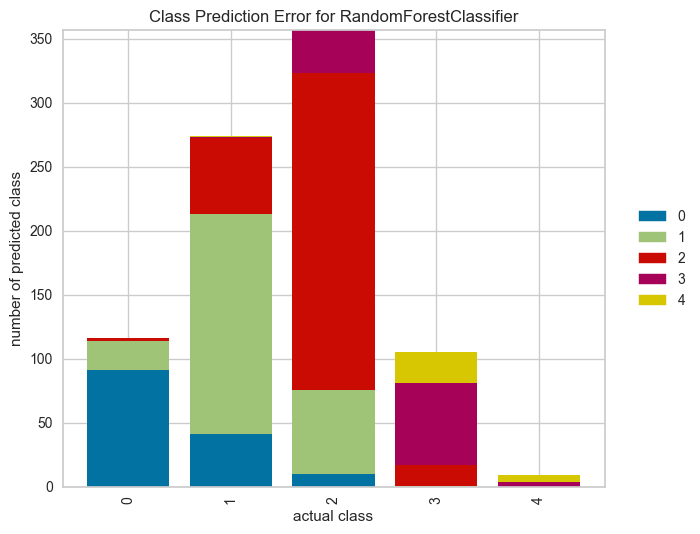

In [71]:
visualizer_rf = ClassPredictionError (clf)
visualizer_rf.fit(X_train, y_train)
visualizer_rf.score(X_test, y_test)
visualizer_rf.show();

Random forest achived acuracy of 63.70%. 

In [112]:
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
print(feature_importances.head(20))

                   feature  importance
4             accommodates    0.056203
6                 bedrooms    0.045865
24       reviews_per_month    0.045231
13        availability_365    0.044254
14       number_of_reviews    0.040237
26    room_Entire home/apt    0.039673
28       room_Private room    0.038302
22     review_scores_value    0.036427
12         availability_90    0.035849
10         availability_30    0.035591
1      host_listings_count    0.035099
11         availability_60    0.034397
21  review_scores_location    0.033525
17    review_scores_rating    0.032761
40      amen_group_kitchen    0.032284
15   number_of_reviews_ltm    0.032111
7                     beds    0.029913
18  review_scores_accuracy    0.028357
5           bathrooms_text    0.027872
43    amen_group_household    0.027140


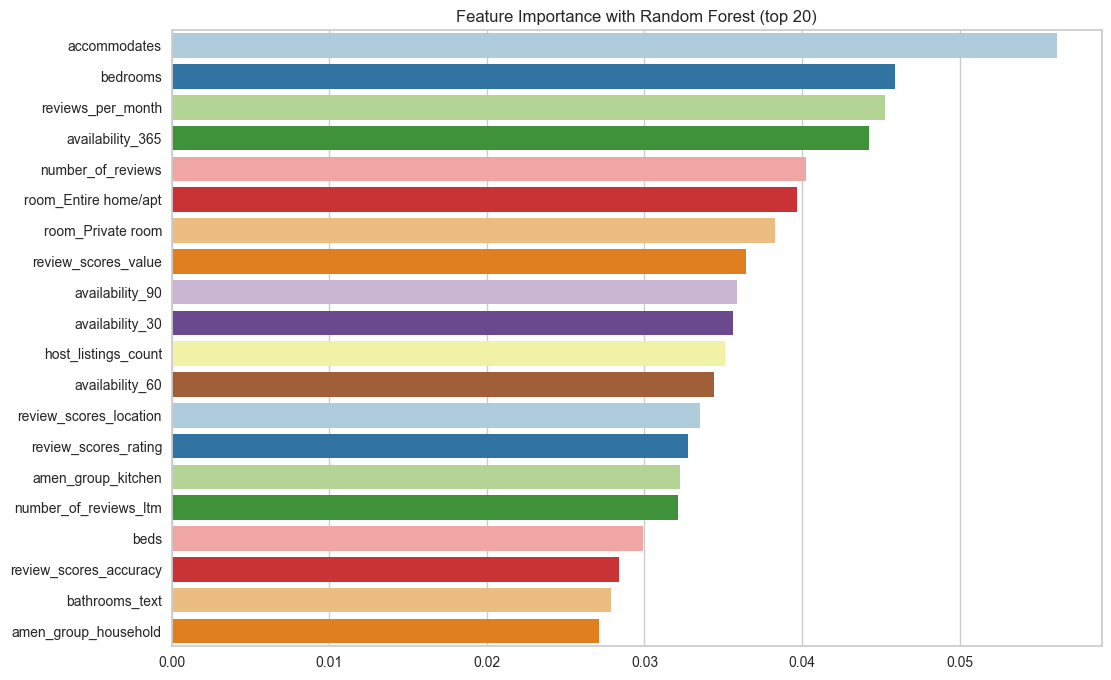

In [215]:
sorted_idx = np.argsort(clf.feature_importances_)[-20:][::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_importances = clf.feature_importances_[sorted_idx]

f, ax = plt.subplots(figsize=(12,8))
plot = sns.barplot(y=sorted_feature_names, x=sorted_importances, palette='Paired')
ax.set_title('Feature Importance with Random Forest (top 20)')
plot.set_yticklabels(plot.get_yticklabels())
plt.show()

Using feature importance for random forest we can see that number of bedrooms and number of people property accommodates are the most important factors. Review scores seem to have an impact too, as well as availability. Kitchen and household amenities are also in top 20 features. 

Random Forest will be further hypertuned with Randomized Search and grid search. 

In [30]:
%%time 

clf = RandomForestClassifier()

param_dist = {"n_estimators": sp_randint(10, 1000),
              "max_depth": sp_randint(3, 20),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 20),
              "max_features": ['sqrt', 'log2'],
              "criterion": ['gini', 'entropy']}

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42)

random_search.fit(X_train, y_train)

print("Best hyperparameters:", random_search.best_params_)

y_pred = random_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Best hyperparameters: {'criterion': 'entropy', 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 938}
Accuracy: 62.93%
CPU times: user 7min 48s, sys: 3.17 s, total: 7min 52s
Wall time: 7min 52s


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       142
           1       0.62      0.60      0.61       262
           2       0.60      0.78      0.68       324
           3       0.61      0.44      0.51       140
           4       0.67      0.10      0.17        41

    accuracy                           0.63       909
   macro avg       0.65      0.52      0.54       909
weighted avg       0.64      0.63      0.62       909



In [135]:

clf2 = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 4, 6]}

grid_search = GridSearchCV(clf2, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.61


No better results.

## XGBoost

In [131]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

f1_score_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
print("F1 score: %.2f%%" % (f1_score_xgb * 100.0))

Accuracy: 64.69%
F1 score: 64.11%


In [74]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72       142
           1       0.64      0.66      0.65       262
           2       0.64      0.74      0.69       324
           3       0.61      0.49      0.54       140
           4       0.39      0.22      0.28        41

    accuracy                           0.65       909
   macro avg       0.61      0.56      0.58       909
weighted avg       0.64      0.65      0.64       909



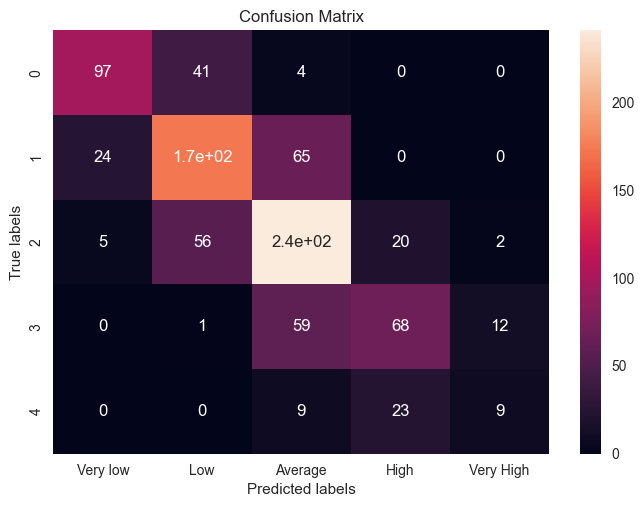

In [76]:
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
ax= plt.subplot()
sns.heatmap( confusion_matrix_xgb, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Very low", "Low", "Average", "High", "Very High"])
ax.yaxis.set_ticklabels(["0", "1", "2", "3", "4"]);

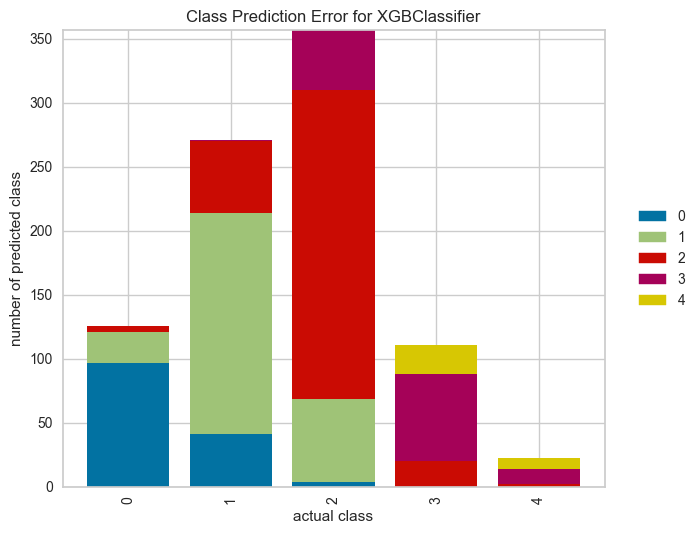

In [75]:
visualizer_xgb = ClassPredictionError(xgboost)
visualizer_xgb.fit(X_train, y_train)
visualizer_xgb.score(X_test, y_test)
visualizer_xgb.show();

In [155]:
xgboost.feature_importances_

array([0.00926118, 0.02379689, 0.00762787, 0.01656173, 0.04287647,
       0.03789202, 0.08905052, 0.01089385, 0.01212771, 0.01049617,
       0.01439521, 0.01025603, 0.00998284, 0.01018981, 0.01182419,
       0.01031763, 0.01099323, 0.01225063, 0.01009722, 0.0103881 ,
       0.00977922, 0.01346646, 0.01261158, 0.00812575, 0.01123957,
       0.0093821 , 0.2751022 , 0.01074681, 0.05559569, 0.0136677 ,
       0.01398871, 0.01821128, 0.01385218, 0.00730866, 0.01066493,
       0.01324706, 0.0292995 , 0.01170601, 0.00891087, 0.01491109,
       0.01106839, 0.00928652, 0.01145354, 0.00952981, 0.00868282,
       0.00895036, 0.00793189], dtype=float32)

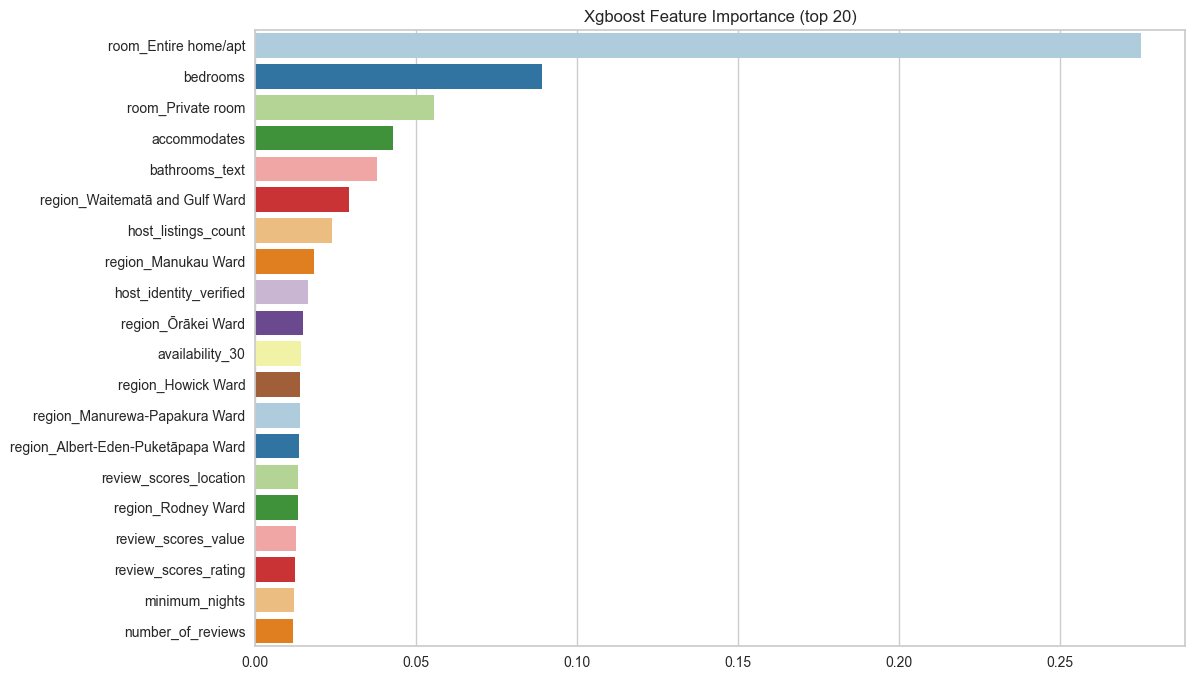

In [182]:
sorted_idx = xgboost.feature_importances_.argsort()[-20:][::-1]
f, ax = plt.subplots(figsize=(12,8))
plot = sns.barplot(y=feature_names[sorted_idx], x=xgboost.feature_importances_[sorted_idx], palette='Paired')
ax.set_title('Xgboost Feature Importance (top 20)')
plt.show()

XGBoost has the best accuracy of all models: 64.69%. 

Feature importance is showing that the most important is if the property is rented as an entire home. Important as well is the number of bedrooms, bathrooms and how many people it accommodates. Important are also (which is different to random forest) host information and few regions. 

In [32]:
%%time

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgboost = XGBClassifier()

param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.3, 0.5],
              'subsample': [0.5, 0.8, 1.0],
              'colsample_bytree': [0.5, 0.8, 1.0],
              'n_estimators': [100, 200, 300]}

grid_search = GridSearchCV(xgboost, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Best hyperparameters: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 64.14%
CPU times: user 2h 14min 34s, sys: 27min 20s, total: 2h 41min 55s
Wall time: 21min 14s


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.68      0.72       142
           1       0.65      0.66      0.65       262
           2       0.64      0.75      0.69       324
           3       0.56      0.44      0.49       140
           4       0.35      0.20      0.25        41

    accuracy                           0.64       909
   macro avg       0.59      0.55      0.56       909
weighted avg       0.64      0.64      0.63       909



In [124]:
xgboost_best = XGBClassifier(colsample_bytree=0.5, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8)

xgboost_best.fit(X_train, y_train)
y_pred_xgb_best = xgboost_best.predict(X_test)
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
print("Accuracy: %.2f%%" % (accuracy_xgb_best * 100.0))

Accuracy: 64.14%


No better results. 

## Conclusion

Best of all models is the XGBoost model with accuracy of 64.49% . Future steps would include deploying the Model and creating an application that will help hosts determine the price. 

Future feature engineering could cover more text data and try to calculate booking percentage with availability columns. However, availability is not the most accurate as we don’t know for how many days hosts actually offer their properties. 

Given business and data questions, the model performed well. 

We can say Waitemata and Gulf Ward and Rodney Ward seem to have the highest median prices which is not surprising given the areas they cover - Central Auckland, beaches and farms. Properties rented out entirely are more popular than shared properties. Both Random Forest and XGBoost feature importance showed that the number of people property accommodates, the number of bedrooms, beds and bathrooms is important in setting the price, which is logical.
Even though 64.49% is not particularly high accuracy, given the problem, the model performed well and can be used as a framework for setting the price if additional information, that is acquired through EDA, is taken into account.
